In [20]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time

%matplotlib inline
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,8)})
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("data/immo_data.csv")
df.head(1)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19


In [34]:
df_dask_copy = df.copy(deep=True)
df_multiprocess = df.copy(deep=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [8]:
(df.isna().sum() / len(df)) * 100

regio1                       0.000000
serviceCharge                2.569834
heatingType                 16.684397
telekomTvOffer              12.132788
telekomHybridUploadSpeed    83.254603
newlyConst                   0.000000
balcony                      0.000000
picturecount                 0.000000
pricetrend                   0.681421
telekomUploadSpeed          12.407662
totalRent                   15.070485
yearConstructed             21.218151
scoutId                      0.000000
noParkSpaces                65.388879
firingTypes                 21.188023
hasKitchen                   0.000000
geo_bln                      0.000000
cellar                       0.000000
yearConstructedRange        21.218151
baseRent                     0.000000
houseNumber                 26.415473
livingSpace                  0.000000
geo_krs                      0.000000
condition                   25.474800
interiorQual                41.906267
petsAllowed                 42.615957
street      

In [140]:
df.describe(include='object')

,regio1,heatingType,telekomTvOffer,firingTypes,geo_bln,houseNumber,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,typeOfFlat,regio2,regio3,description,facilities,energyEfficiencyClass,date
count,268850,223994,236231,211886,268850,197832,268850,200361,156185,154277,268850,197837,232236,268850,268850,249103,215926,77787,268850
unique,16,13,3,132,16,5510,419,10,4,3,52373,54490,10,419,8684,212621,189526,10,4
top,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,gas,Nordrhein_Westfalen,1,Leipzig,well_kept,normal,negotiable,no_information,Hauptstraße,apartment,Leipzig,Innenstadt,+ MEIN GUENTZ - Quartier der Generationen\r\n+ bis 2020 ...,Laminat,C,Feb20
freq,62863,128977,227632,110899,62863,7173,13723,66591,81826,91970,71013,911,131522,13723,4751,216,207,14613,79276


In [68]:
print(df['geo_krs'].equals(df['regio2'])) # we will drop geo_krs
print(df['geo_bln'].equals(df['regio1'])) # we will drop geo_bln

True
True


In [95]:
df[['streetPlain', 'street']] # we will drop street

,streetPlain,street
0,Schüruferstraße,Sch&uuml;ruferstra&szlig;e
1,NaN,no_information
2,Turnerweg,Turnerweg
3,Glück-Auf-Straße,Gl&uuml;ck-Auf-Stra&szlig;e
4,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee
...,...,...
268845,NaN,no_information
268846,NaN,no_information
268847,Emsbachstrasse,Emsbachstrasse
268848,Idastraße,Idastra&szlig;e


Text(0, 0.5, 'Count')

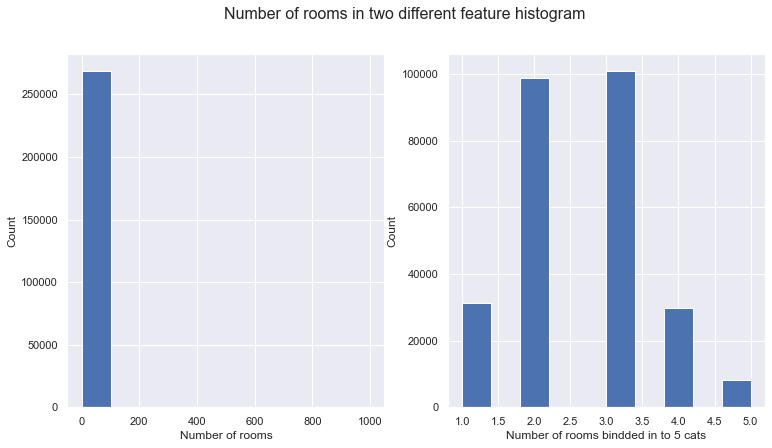

In [132]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False)
fig.set_size_inches(12.5, 6.5)
fig.suptitle('Number of rooms in two different feature histogram', fontsize=16)

df['noRooms'].hist(ax=ax1)
ax1.set_xlabel("Number of rooms")
ax1.set_ylabel("Count")

df['noRoomsRange'].hist(ax=ax2)
ax2.set_xlabel("Number of rooms bindded in to 5 cats")
ax2.set_ylabel("Count")

# we will drop noRooms and noRooms bigger than 10 because it seems that there 
# are most likely outliers because of their price range

0.00020829458806025664


<AxesSubplot:>

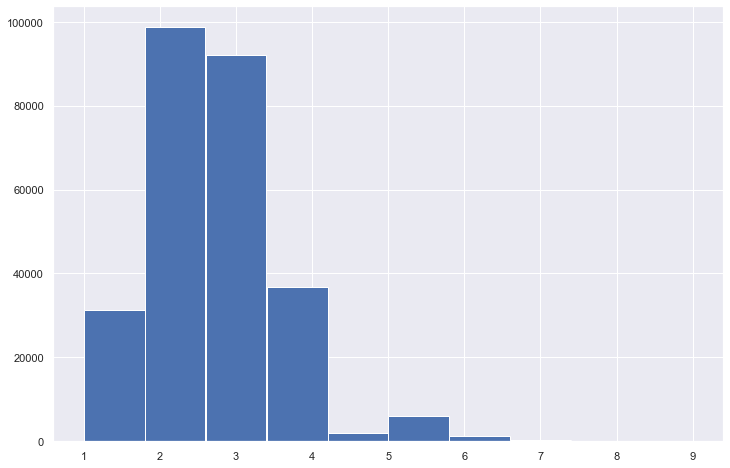

In [188]:
print(len(df.loc[df['noRooms'] > 10, 'noRooms']) / len(df))
df.loc[df['noRooms']< 10, 'noRooms'].hist()

Text(0, 0.5, 'Count')

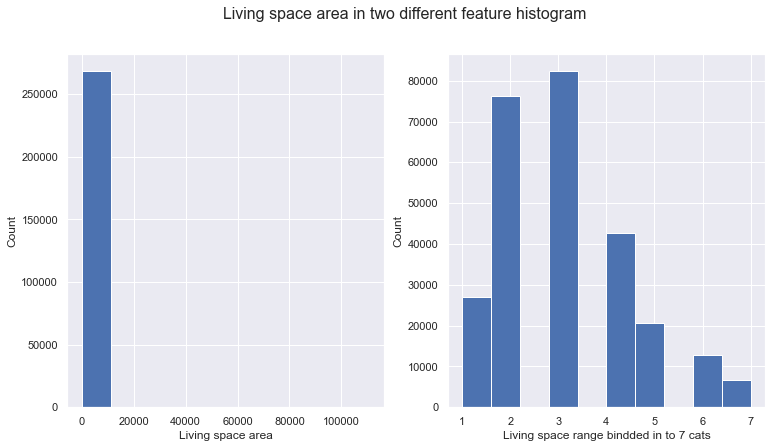

In [146]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False)
fig.set_size_inches(12.5, 6.5)
fig.suptitle('Living space area in two different feature histogram', fontsize=16)

df['livingSpace'].hist(ax=ax1)
ax1.set_xlabel("Living space area")
ax1.set_ylabel("Count")

df['livingSpaceRange'].hist(ax=ax2)
ax2.set_xlabel("Living space range bindded in to 7 cats")
ax2.set_ylabel("Count")

# we will drop livingSpace

0.6654268179282128
18.0


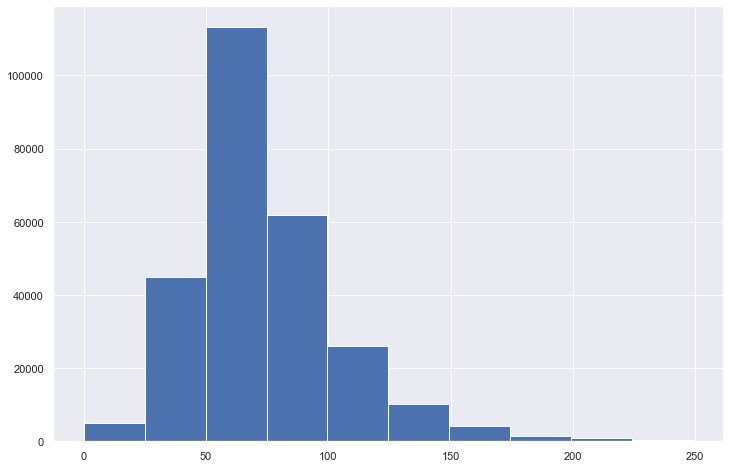

In [144]:
print(len(df.loc[(df['livingSpace'] > 250) | (df['livingSpace'] < 18), 'livingSpace']) / len(df) * 100)
df.loc[df['livingSpace']< 250, 'livingSpace'].hist()
print(df.loc[df['livingSpace']< 250, 'livingSpace'].quantile(0.005))

# we will drop living space bigger than 250 and less than 18.

Text(0, 0.5, 'Count')

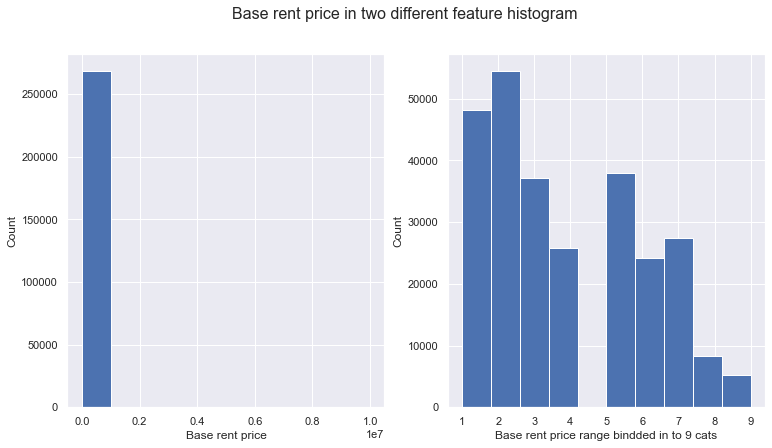

In [159]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False)
fig.set_size_inches(12.5, 6.5)
fig.suptitle('Base rent price in two different feature histogram', fontsize=16)

df['baseRent'].hist(ax=ax1)
ax1.set_xlabel("Base rent price")
ax1.set_ylabel("Count")

df['baseRentRange'].hist(ax=ax2)
ax2.set_xlabel("Base rent price range bindded in to 9 cats")
ax2.set_ylabel("Count")

# we will drop base rent

0.004950716012646457


<AxesSubplot:>

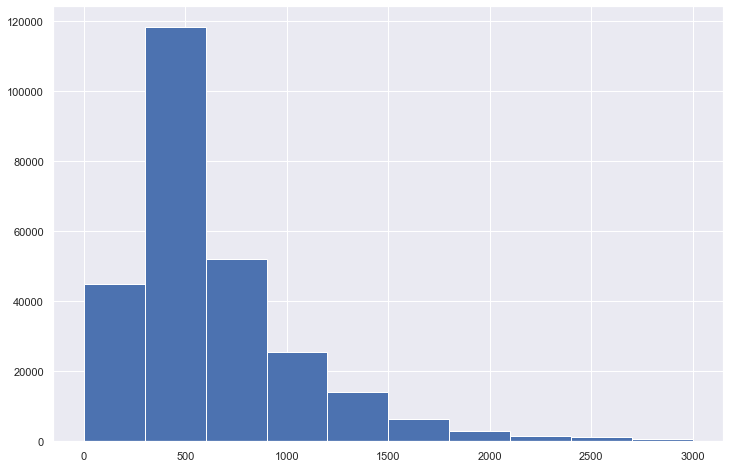

In [193]:
print(len(df.loc[df['baseRent'] > 3000, 'baseRent']) / len(df))
df.loc[df['baseRent'] < 3000, 'baseRent'].hist()

# we will drop instances with base rent bigger than 3000

In [169]:
df.loc[((df['energyEfficiencyClass'].isna()) | (df['energyEfficiencyClass'] == 'NO_INFORMATION')), ['energyEfficiencyClass', 'thermalChar']].tail()

,energyEfficiencyClass,thermalChar
268845,NaN,NaN
268846,NaN,NaN
268847,NaN,160.750000
268848,NO_INFORMATION,24.703125
268849,NaN,NaN


0.001870931746326948


<AxesSubplot:>

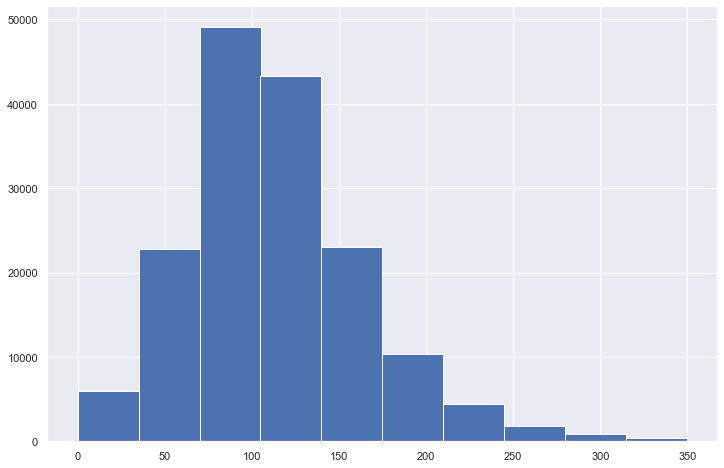

In [194]:
print(len(df.loc[df['thermalChar'] > 350, 'thermalChar']) / len(df))
df.loc[df['thermalChar'] < 350, 'thermalChar'].hist()

# we will drop energyEfficiencyClass because it is based on thermalChar and has extra null values.
# we will drop thermalChar bigger than 350.

In [63]:
len(df.loc[(df['lastRefurbish'] > 2021) | (df['lastRefurbish'] < 1950)])

#should be drop

17

1000.0     1
1005.0     1
1007.0     1
1027.0     1
1036.0     1
          ..
2021.0    15
2022.0     2
2026.0     3
2029.0     1
2090.0     1
Name: yearConstructed, Length: 465, dtype: int64


<AxesSubplot:>

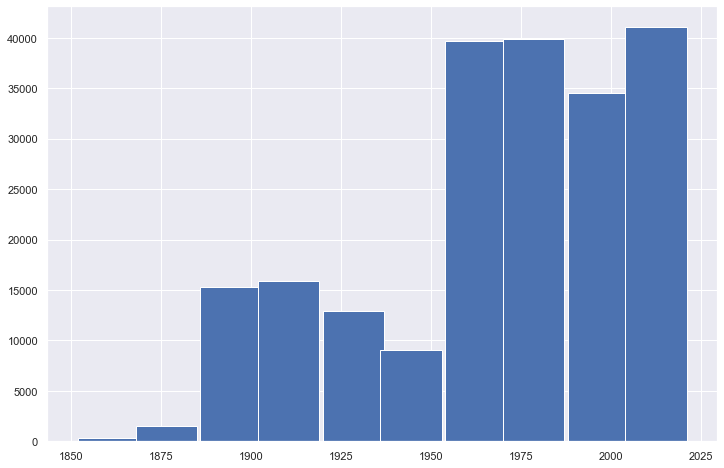

In [225]:
print(df['yearConstructed'].value_counts().sort_index())
df.loc[((df['yearConstructed'] > 1850) & (df['yearConstructed'] < 2022)), 'yearConstructed'].hist()

In [226]:
df.loc[df['yearConstructed'] > df['lastRefurbish']]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date


In [227]:
df['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    227632
NONE               4957
ON_DEMAND          3642
Name: telekomTvOffer, dtype: int64

In [228]:
df['telekomHybridUploadSpeed'].value_counts() #shold be drop

10.0    45020
Name: telekomHybridUploadSpeed, dtype: int64

0.0025888041658917614


<AxesSubplot:>

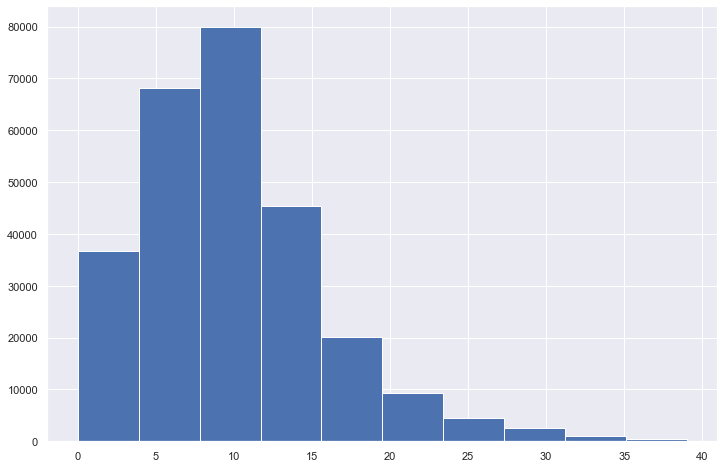

In [231]:
print(len(df.loc[df['picturecount'] > 40, 'picturecount']) / len(df))
df.loc[df['picturecount'] < 40, 'picturecount'].hist()

In [234]:
df['scoutId'].is_unique # set index to this column

True

0.3250883392226148


<AxesSubplot:>

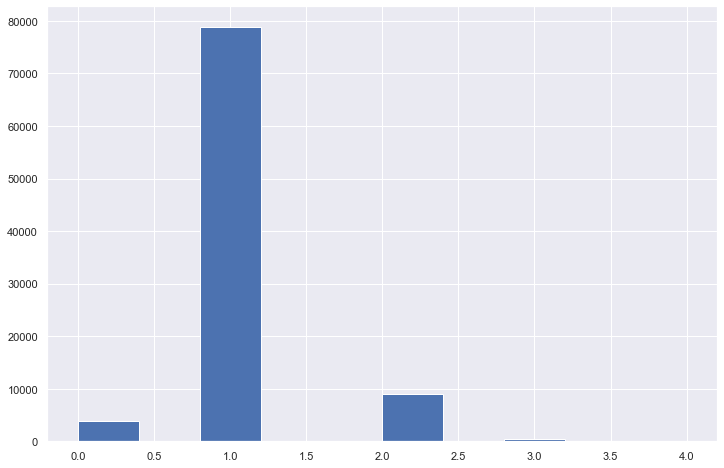

In [249]:
print(len(df.loc[df['noParkSpaces'] > 4]) / len(df) * 100)
df.loc[df['noParkSpaces']  < 5, 'noParkSpaces'].hist()

In [250]:
df['firingTypes'].unique()

['oil', 'gas', NaN, 'district_heating', 'gas:electricity', ..., 'geothermal:solar_heating:gas', 'electricity:wood_chips', 'electricity:coal', 'solar_heating:bio_energy', 'district_heating:hydro_energy']
Length: 133
Categories (132, object): ['bio_energy', 'coal', 'coal_coke', 'combined_heat_and_power_bio_energy', ..., 'steam_district_heating', 'wind_energy', 'wood', 'wood_chips']

In [253]:
print((df['electricityBasePrice'].isna().sum()) / len(df))
print((df['electricityKwhPrice'].isna().sum()) / len(df))


 # too many null values, can't fill them with an appropriate value, they will be drop

0.8257541379951646

In [310]:
df['heatingType'].value_counts()

central_heating                   127109
district_heating                   24565
gas_heating                        19643
self_contained_central_heating     18728
floor_heating                      17291
oil_heating                         4979
heat_pump                           2692
combined_heat_and_power_plant       1952
night_storage_heater                1328
wood_pellet_heating                  944
electric_heating                     893
stove_heating                        329
solar_heating                        165
Name: heatingType, dtype: int64

In [311]:
df['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    224243
NONE               4862
ON_DEMAND          3572
Name: telekomTvOffer, dtype: int64

In [313]:
df.loc[df['telekomTvOffer'].isna(), ['telekomTvOffer', 'telekomHybridUploadSpeed', 'telekomUploadSpeed']]

,telekomTvOffer,telekomHybridUploadSpeed,telekomUploadSpeed
4,NaN,NaN,NaN
40,NaN,NaN,NaN
45,NaN,NaN,NaN
46,NaN,NaN,NaN
48,NaN,NaN,NaN
...,...,...,...
268822,NaN,NaN,NaN
268838,NaN,NaN,NaN
268846,NaN,NaN,NaN
268848,NaN,NaN,NaN


In [319]:
df.loc[df['telekomTvOffer'] == "NONE", ['telekomTvOffer', 'telekomHybridUploadSpeed', 'telekomUploadSpeed']]

,telekomTvOffer,telekomHybridUploadSpeed,telekomUploadSpeed
5,NONE,NaN,2.4
12,NONE,NaN,2.4
66,NONE,NaN,2.4
78,NONE,NaN,2.4
108,NONE,NaN,2.4
...,...,...,...
268511,NONE,NaN,2.4
268527,NONE,NaN,2.4
268603,NONE,NaN,2.4
268627,NONE,NaN,2.4


In [324]:
len(df.loc[df['pricetrend'].isna()]) / len(df)  * 100#instances with null values will be drop, just  0.6% of the whole data

0.6814208666542682

In [328]:
df['telekomUploadSpeed'].value_counts()

40.0     158296
2.4       42858
10.0      32889
5.0        1036
1.0         209
100.0       141
4.0          63
Name: telekomUploadSpeed, dtype: int64

In [329]:
df['noParkSpaces'].value_counts()

1.0       78814
2.0        8955
0.0        3855
3.0         417
4.0         137
          ...  
37.0          1
73.0          1
310.0         1
2241.0        1
58.0          1
Name: noParkSpaces, Length: 71, dtype: int64

In [333]:
df.loc[df['firingTypes'].isna()].head(2) # fill null values with most frequent value

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.8,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neustadt.\nDa...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche, Badewanne...",NaN,NaN,NaN,NaN,NaN,Oct19
6,Sachsen,70.0,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.01,2.4,380.0,NaN,114391930,NaN,NaN,False,Sachsen,True,NaN,310.0,14,62.0,Mittelsachsen_Kreis,fully_renovated,NaN,NaN,Am Bahnhof,Am_Bahnhof,False,2,NaN,9599,2.0,NaN,1.0,4.0,2,True,3,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warmwasseraufb...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20


In [22]:
df['interiorQual'].value_counts()

normal           81156
sophisticated    63648
luxury            6871
simple            1918
Name: interiorQual, dtype: int64

In [23]:
df['petsAllowed'].value_counts()

negotiable    90671
no            51309
yes           10120
Name: petsAllowed, dtype: int64

<AxesSubplot:>

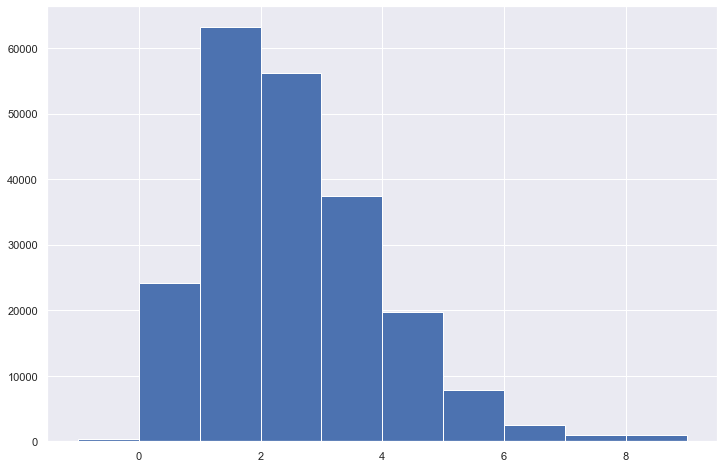

In [50]:
df.loc[df['floor'] < 10, 'floor'].hist() #instances with -1 or bigger than 10 floor will be drop

<AxesSubplot:>

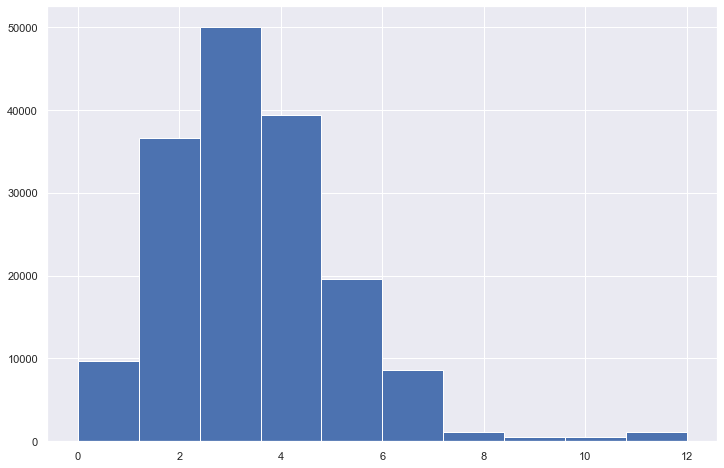

In [60]:
df.loc[df['numberOfFloors'] < 13, 'numberOfFloors'].hist()

In [61]:
df['numberOfFloors'].value_counts().sort_index(ascending=True) 

#instances with number of floors 0 and bigger than 12 will be drop

0.0       1355
1.0       8280
2.0      36621
3.0      49969
4.0      39340
5.0      19532
6.0       6144
7.0       2493
8.0       1123
9.0        509
10.0       566
11.0       923
12.0       166
13.0       114
14.0       168
15.0        74
16.0       104
17.0        59
18.0        45
19.0        32
20.0        30
21.0        17
22.0        12
23.0        18
24.0         4
25.0         2
26.0         5
27.0         2
29.0         1
30.0         2
31.0         5
32.0         1
34.0         2
36.0         1
40.0        10
42.0         1
43.0         2
54.0         1
90.0         1
92.0         1
99.0         2
200.0        1
252.0        1
301.0        1
370.0        1
378.0        1
400.0        1
410.0        1
594.0        1
600.0        1
730.0        1
800.0        2
999.0        3
Name: numberOfFloors, dtype: int64

<AxesSubplot:>

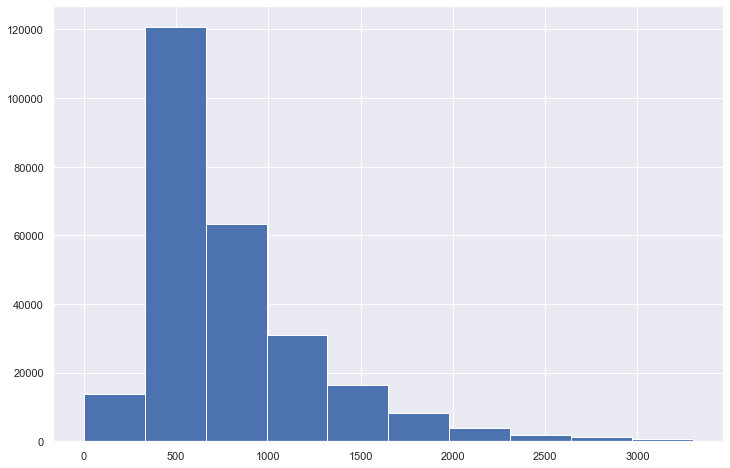

In [108]:
df.loc[df['totalRent'] < 3300, 'totalRent'].hist()

In [116]:
df.loc[df['totalRent'] < 3300, 'totalRent'].quantile(0.025) 

#total rents with less than 250 or bigger than 3300 will be drop

285.187

<AxesSubplot:>

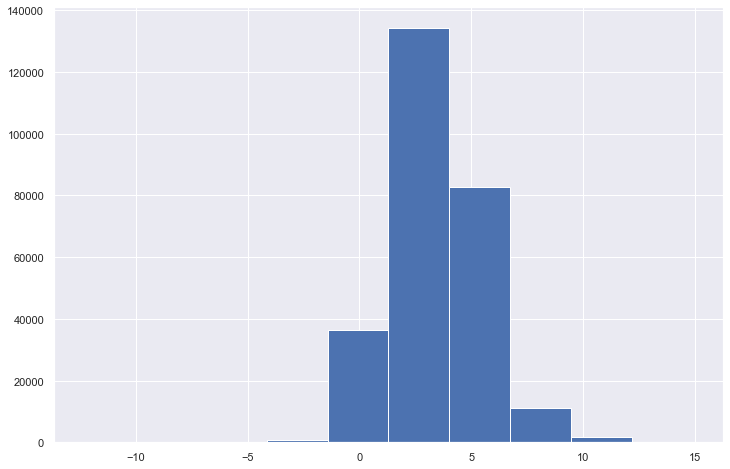

In [121]:
df['pricetrend'].hist()

In [35]:
import math

def data_cleaner(df):
    '''
    Drops irrational instances, columns, and duplicates, fills missing values
    Arguments:
        df is a n-by-d pandas data frame
    Returns:
        the final dataframe 
    '''

    pre_size_df = df.shape
      
    df.drop(df.loc[df['noRooms'] > 10].index, inplace=True, axis=0)
    df.drop(df.loc[df['noParkSpaces'] > 4].index, inplace=True, axis=0)
    df.drop(df.loc[df['thermalChar'] > 350].index, inplace=True, axis=0)
    df.drop(df.loc[df['baseRent'] > 3000].index, inplace=True, axis=0)
    df.drop(df.loc[df['livingSpace'] > 250].index, inplace=True, axis=0)
    df.drop(df.loc[((df['livingSpace'] < 18) |
                    (df['livingSpace'] > 250))].index, inplace=True, axis=0)
    df.drop(df.loc[(df['lastRefurbish'] > 2021) |
            (df['lastRefurbish'] < 1950)].index, inplace=True, axis=0)
    df.drop(df.loc[(df['floor'] > 10) |
            (df['floor'] < 0)].index, inplace=True, axis=0)
    df.drop(df.loc[(df['numberOfFloors'] > 12) |
            (df['numberOfFloors'] < 1)].index, inplace=True, axis=0)
    df.drop(df.loc[((df['yearConstructed'] < 1850) |
                    (df['yearConstructed'] > 2022))].index, inplace=True, axis=0)
    df.drop(df.loc[df['picturecount'] > 40].index, inplace=True, axis=0)
        
    df['baseRent'].fillna(0, inplace=True)
    df['heatingCosts'].fillna(0, inplace=True)
    df['serviceCharge'].fillna(0, inplace=True)
    df['totalRent'].fillna(df['baseRent'] + df['serviceCharge'] + df['heatingCosts'], 
                           inplace=True) #based on the data documentation
    df['heatingType'].fillna(value='no_heating', inplace=True)
    df['telekomTvOffer'].fillna(value='NO_INFO', inplace=True)
    df['telekomUploadSpeed'].fillna(value=0, inplace=True)
    df['noParkSpaces'].fillna(value=0, inplace=True)
    df['firingTypes'].fillna(value=df['firingTypes'].value_counts().index[0], inplace=True)
    df['petsAllowed'].fillna(value=df['petsAllowed'].value_counts().index[0], inplace=True)
    df['typeOfFlat'].fillna(value=df['typeOfFlat'].value_counts().index[0], inplace=True)
    df['thermalChar'].fillna(value=df['thermalChar'].mean(), inplace=True)
    df['numberOfFloors'].fillna(value=df['numberOfFloors'].mean().round(0), inplace=True)
    df['floor'].fillna(value=df['floor'].mean().round(0), inplace=True)
    df['pricetrend'].fillna(value=df['pricetrend'].mean(), inplace=True)
    df['condition'].fillna('other', inplace=True)
    df['yearConstructed'].fillna(df.groupby('condition')['yearConstructed'].\
                                 transform('mean').round(0), inplace=True)
    df['interiorQual'].fillna('other', inplace=True)
    df['streetPlain'].fillna('other', inplace=True)
    df['description'].fillna('other', inplace=True)
    df['facilities'].fillna('other', inplace=True)

    df['has_refurbished'] = df['lastRefurbish'].apply(lambda x: False if math.isnan(x) else True)
    

    df.drop(df.loc[df['telekomTvOffer'].isna()].index, inplace=True, axis=0)
    df.drop(df.loc[df['totalRent'].isna()].index, inplace=True, axis=0)        
    df.drop(df.loc[((df['totalRent'] < 250) | (df['totalRent'] > 3300))].index,
            inplace=True, axis=0)

    df['floor_division'] = df['floor'] / df['numberOfFloors'] 
    df['meter_price'] = df['baseRent'] / df['livingSpace']

    drop_cols = ["houseNumber", "geo_krs", "geo_bln", "street",
                 "noRooms", "livingSpace", "baseRent",
                 "energyEfficiencyClass", "yearConstructedRange",
                 "telekomHybridUploadSpeed", "date",
                 "electricityBasePrice", "electricityKwhPrice",
                 "serviceCharge", "heatingCosts", "lastRefurbish"]

    df.drop(drop_cols, inplace=True, axis=1)

    df.drop_duplicates(keep='first', inplace=True)

    print("Shape dataframe before drop section: ", pre_size_df)
    print("Shape dataframe after drop section: ", df.shape)
    print(f"{pre_size_df[0] - df.shape[0]} instances were droped. \
          ({((pre_size_df[0] - df.shape[0]) / pre_size_df[0]) * 100 } % of the whole dataset.) \
          {len(drop_cols)} columns were droped, and 2 were added.")

    df.set_index('scoutId', inplace=True)

    return df

In [36]:
time_start = time.time()
df = data_cleaner(df)
print("time: ", time.time() - time_start)
(df.isna().sum() / len(df)) * 100

Shape dataframe before drop section:  (268850, 49)
Shape dataframe after drop section:  (256502, 36)
12348 instances were droped.           (4.592895666728659 % of the whole dataset.)           16 columns were droped, and 2 were added.
time:  3.1143739223480225


regio1                0.0
heatingType           0.0
telekomTvOffer        0.0
newlyConst            0.0
balcony               0.0
picturecount          0.0
pricetrend            0.0
telekomUploadSpeed    0.0
totalRent             0.0
yearConstructed       0.0
noParkSpaces          0.0
firingTypes           0.0
hasKitchen            0.0
cellar                0.0
condition             0.0
interiorQual          0.0
petsAllowed           0.0
streetPlain           0.0
lift                  0.0
baseRentRange         0.0
typeOfFlat            0.0
geo_plz               0.0
thermalChar           0.0
floor                 0.0
numberOfFloors        0.0
noRoomsRange          0.0
garden                0.0
livingSpaceRange      0.0
regio2                0.0
regio3                0.0
description           0.0
facilities            0.0
has_refurbished       0.0
floor_division        0.0
meter_price           0.0
dtype: float64

In [163]:
df.loc[df.duplicated()].head(3) 

# added drop duplicate values to data cleaner function.

,regio1,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,cellar,condition,interiorQual,petsAllowed,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,has_refurbished
scoutId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109376536,Sachsen,district_heating,ONE_YEAR_FREE,False,True,4,2.19,2.4,290.1,1984.0,0.0,district_heating,False,False,negotiable,other,negotiable,Wendel-Roskopf-Str.,False,1,apartment,2828,125.000000,5.0,3.0,3,False,3,Görlitz,Königshufen,Der Stadtteil Königshufen befindet sich im Nor...,Diese Wohnung wird komplett renoviert und nach...,False
113724699,Sachsen,gas_heating,ONE_YEAR_FREE,False,True,5,-0.20,40.0,345.0,1920.0,0.0,gas,False,True,well_kept,other,negotiable,Orthstraße,False,1,roof_storey,9131,113.222305,4.0,3.0,2,True,2,Chemnitz,Hilbersdorf,Die Wohnung liegt im 4. Obergeschoss eines wun...,großer sonniger Süd-West Balkon\ngeräumiger Fl...,True
113150359,Mecklenburg_Vorpommern,no_heating,ONE_YEAR_FREE,False,False,8,2.76,10.0,570.0,1957.0,0.0,gas,False,True,modernized,other,negotiable,Elisabethstraße,False,2,roof_storey,17235,132.000000,2.0,3.0,3,False,3,Mecklenburg_Strelitz_Kreis,Neustrelitz,Es handelt sich um eine große 3 - Zimmer Dachg...,Für einen Aufpreis von 65 € lassen wir in der ...,False


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256224 entries, 96107057 to 110938302
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   regio1              256224 non-null  object 
 1   heatingType         256224 non-null  object 
 2   telekomTvOffer      256224 non-null  object 
 3   newlyConst          256224 non-null  bool   
 4   balcony             256224 non-null  bool   
 5   picturecount        256224 non-null  int64  
 6   pricetrend          256224 non-null  float64
 7   telekomUploadSpeed  256224 non-null  float64
 8   totalRent           256224 non-null  float64
 9   yearConstructed     256224 non-null  float64
 10  noParkSpaces        256224 non-null  float64
 11  firingTypes         256224 non-null  object 
 12  hasKitchen          256224 non-null  bool   
 13  cellar              256224 non-null  bool   
 14  condition           256224 non-null  object 
 15  interiorQual        2562

0.02897120888241604


<AxesSubplot:>

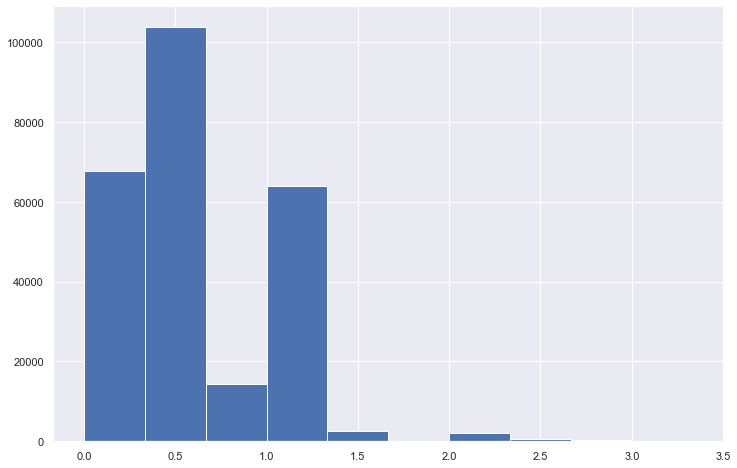

In [12]:
print(len(df.loc[df['floor_division'] > 3.5, 'floor_division']) / len(df) * 100)
df.loc[df['floor_division'] < 3.6, 'floor_division'].hist()

0.33434341061599054


<AxesSubplot:>

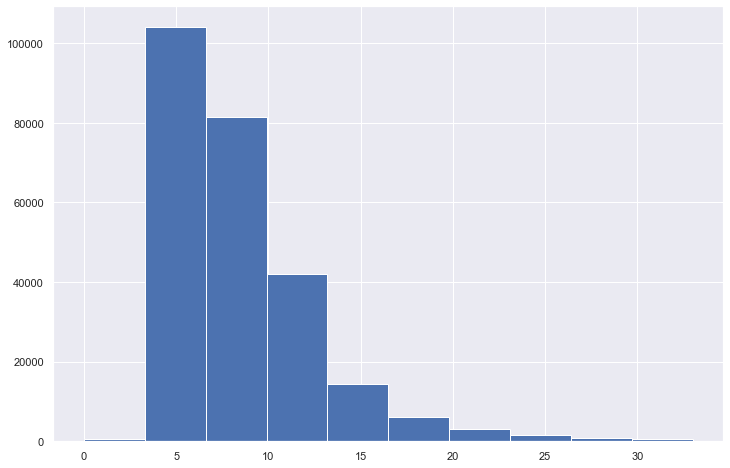

In [17]:
print(len(df.loc[df['meter_price'] > 33, 'meter_price']) / len(df) * 100)
df.loc[df['meter_price'] < 33, 'meter_price'].hist()

In [18]:
df.drop(df.loc[df['floor_division'] > 3.5].index, inplace=True)
df.drop(df.loc[df['meter_price'] > 33].index, inplace=True)

In [19]:
df.to_csv("data/cleaned.csv")

## Multiprocessing

In [6]:
from multiprocessing import Pool
import cleaner


if __name__ == "__main__":
    times = []
    for n_procs in range(2, 20):
        splits = np.array_split(df_multiprocess, n_procs)
        time_start = time.time()
        with Pool(n_procs) as p:
            final_df = pd.concat(p.map(cleaner.data_cleaner, splits))
        times.append(time.time() - time_start)

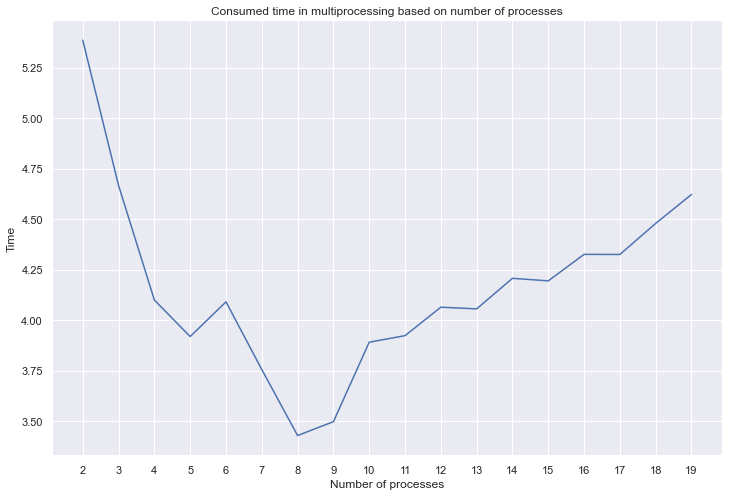

In [19]:
plt.plot(range(2, 20), times)
plt.xticks(range(2, 20))
axis = plt.gca()
axis.set_xlabel("Number of processes")
axis.set_ylabel("Time")
plt.title("Consumed time in multiprocessing based on number of processes")
plt.show()

In [22]:
min(times)

3.428617238998413

## Dask

In [23]:
import dask
import dask.dataframe as dd

In [43]:
times_dask = []
for npart in range(2, 20):
    dask_df = dd.from_pandas(df_dask_copy, npartitions=npart)
    time_start = time.time()
    dask_df = dask_df.map_partitions(cleaner.data_cleaner, meta=df).compute()
    times_dask.append(time.time() - time_start)

Shape dataframe before drop section:  (134425, 49)
Shape dataframe after drop section:  (128084, 36)
6341 instances were droped.           (4.717128510321741 % of the whole dataset.)           16 columns were droped, and 2 were added.
Shape dataframe before drop section:  (134425, 49)
Shape dataframe after drop section:  (128418, 36)
6007 instances were droped.           (4.468662823135578 % of the whole dataset.)           16 columns were droped, and 2 were added.
Shape dataframe before drop section:  (89617, 49)
Shape dataframe after drop section:  (85361, 36)
4256 instances were droped.           (4.749098943280851 % of the whole dataset.)           16 columns were droped, and 2 were added.
Shape dataframe before drop section:  (89617, 49)
Shape dataframe after drop section:  (85462, 36)
4155 instances were droped.           (4.63639711215506 % of the whole dataset.)           16 columns were droped, and 2 were added.
Shape dataframe before drop section:  (89616, 49)
Shape dataframe

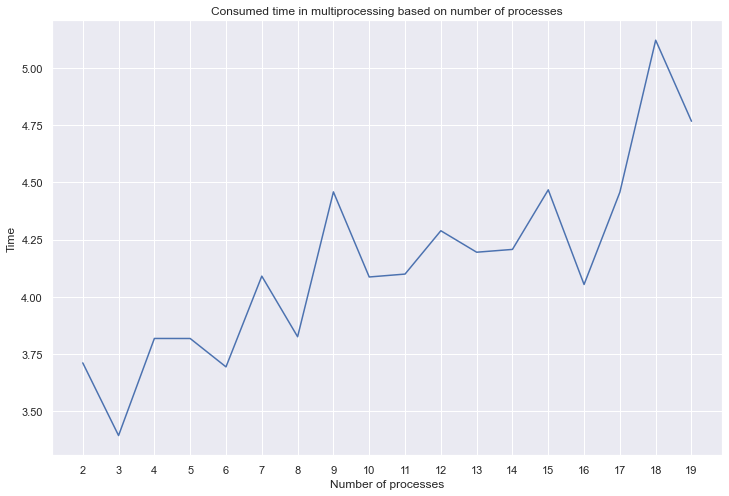

In [44]:
plt.plot(range(2, 20), times_dask)
plt.xticks(range(2, 20))
axis = plt.gca()
axis.set_xlabel("Number of partitions")
axis.set_ylabel("Time")
plt.title("Consumed time for preprocessing using Dask based on number of partitions")
plt.show()

In [45]:
min(times_dask)

3.393486738204956